In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from graphufs.stacked_utils import convert_loss_channel2var, get_channel_index
from prototypes.stacked_cp0.config import StackedCP0Emulator as Emulator 
from graphufs.datasets import Dataset

In [2]:
_prototype_dir = "/global/homes/n/nagarwal/graph-ufs/prototypes/stacked_cp0"

In [3]:
path_loss = os.path.join(_prototype_dir, "local-output", "loss.nc")
ds = xr.open_dataset(path_loss)
ds.load()

<xarray.Dataset> Size: 24kB
Dimensions:                (optim_step: 110, epoch: 5, channel: 43)
Coordinates:
  * optim_step             (optim_step) int64 880B 0 1 2 3 4 ... 106 107 108 109
  * epoch                  (epoch) int64 40B 1 2 3 4 5
  * channel                (channel) int64 344B 0 1 2 3 4 5 ... 38 39 40 41 42
Data variables:
    loss                   (optim_step) float32 440B 1.766 1.65 ... 1.023 1.022
    loss_by_channel        (optim_step, channel) float32 19kB 0.06667 ... 0.05
    loss_by_channel_valid  (epoch, channel) float32 860B 0.01576 ... 0.02856
    loss_avg               (epoch) float32 20B 1.266 1.108 1.063 1.031 1.018
    loss_valid             (epoch) float32 20B 1.25 1.146 1.096 1.156 1.176
    mgrad                  (epoch) float32 20B 0.000104 6.537e-05 ... 6.451e-05
    g_norm                 (optim_step) float64 880B nan nan nan ... nan nan nan
    learning_rate          (optim_step) float32 440B 0.0 0.0001 ... 2.467e-07
    epoch_label            (optim_step) float64 880B 1.0 1.0 1.0 ... 5.0 5.0 5.0
Attributes:
    batch_size:  16

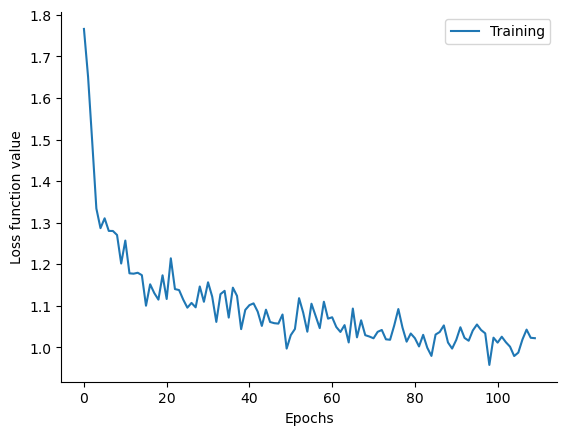

In [4]:
fig, ax = plt.subplots()

ax.plot(ds.loss, label="Training")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
#fig.savefig("loss.png")
plt.show()

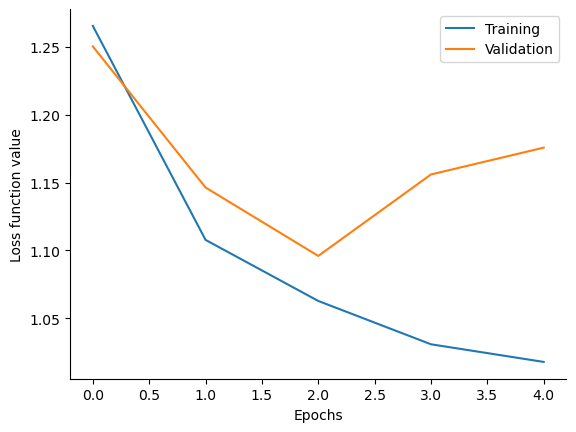

In [5]:
fig, ax = plt.subplots()
epochs = 5

ax.plot(ds.loss_avg, label="Training")
ax.plot(ds.loss_valid, label="Validation")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
#fig.savefig("loss.png")
plt.show()

In [6]:
# get channel indices
em = Emulator()
tds = Dataset(em, mode="training")
xinputs, xtargets, _ = tds.get_xarrays(0)

tmeta_inp = get_channel_index(xinputs)
tmeta_tar = get_channel_index(xtargets)

/global/homes/n/nagarwal/graph-ufs/graphufs/fvcoupledemulator.py:27: UserWarning: Could not import flox, install with 'conda install -c conda-forge flox' for faster volume averaging (i.e. groupby operations)
  warnings.warn("Could not import flox, install with 'conda install -c conda-forge flox' for faster volume averaging (i.e. groupby operations)")


In [7]:
tmeta_inp

{0: {'varname': 'LW', 'time': 0},
 1: {'varname': 'LW', 'time': 1},
 2: {'varname': 'SSH', 'time': 0},
 3: {'varname': 'SSH', 'time': 1},
 4: {'varname': 'SW', 'time': 0},
 5: {'varname': 'SW', 'time': 1},
 6: {'varname': 'day_progress_cos', 'time': 0},
 7: {'varname': 'day_progress_cos', 'time': 1},
 8: {'varname': 'day_progress_sin', 'time': 0},
 9: {'varname': 'day_progress_sin', 'time': 1},
 10: {'varname': 'dswrf_avetoa', 'time': 0},
 11: {'varname': 'dswrf_avetoa', 'time': 1},
 12: {'varname': 'land_static'},
 13: {'varname': 'landsea_mask', 'z_l': 0},
 14: {'varname': 'landsea_mask', 'z_l': 1},
 15: {'varname': 'landsea_mask', 'z_l': 2},
 16: {'varname': 'landsea_mask', 'z_l': 3},
 17: {'varname': 'landsea_mask', 'z_l': 4},
 18: {'varname': 'landsea_mask', 'z_l': 5},
 19: {'varname': 'landsea_mask', 'z_l': 6},
 20: {'varname': 'landsea_mask', 'z_l': 7},
 21: {'varname': 'landsea_mask', 'z_l': 8},
 22: {'varname': 'landsea_mask', 'z_l': 9},
 23: {'varname': 'so', 'z_l': 0, 'time'

In [8]:
tmeta_tar

{0: {'varname': 'LW', 'time': 0},
 1: {'varname': 'SSH', 'time': 0},
 2: {'varname': 'SW', 'time': 0},
 3: {'varname': 'so', 'z_l': 0, 'time': 0},
 4: {'varname': 'so', 'z_l': 1, 'time': 0},
 5: {'varname': 'so', 'z_l': 2, 'time': 0},
 6: {'varname': 'so', 'z_l': 3, 'time': 0},
 7: {'varname': 'so', 'z_l': 4, 'time': 0},
 8: {'varname': 'so', 'z_l': 5, 'time': 0},
 9: {'varname': 'so', 'z_l': 6, 'time': 0},
 10: {'varname': 'so', 'z_l': 7, 'time': 0},
 11: {'varname': 'so', 'z_l': 8, 'time': 0},
 12: {'varname': 'so', 'z_l': 9, 'time': 0},
 13: {'varname': 'temp', 'z_l': 0, 'time': 0},
 14: {'varname': 'temp', 'z_l': 1, 'time': 0},
 15: {'varname': 'temp', 'z_l': 2, 'time': 0},
 16: {'varname': 'temp', 'z_l': 3, 'time': 0},
 17: {'varname': 'temp', 'z_l': 4, 'time': 0},
 18: {'varname': 'temp', 'z_l': 5, 'time': 0},
 19: {'varname': 'temp', 'z_l': 6, 'time': 0},
 20: {'varname': 'temp', 'z_l': 7, 'time': 0},
 21: {'varname': 'temp', 'z_l': 8, 'time': 0},
 22: {'varname': 'temp', 'z_l':

In [9]:
xtargets.z_l

<xarray.DataArray 'z_l' (z_l: 10)> Size: 80B
array([  0.515404,   2.764564,   7.648268,  15.945962,  29.77691 ,  55.888266,
        93.665785, 152.092546, 271.222797, 417.704201])
Coordinates:
  * z_l      (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7

In [10]:
# covert channel loss to var loss
var_loss = convert_loss_channel2var(Emulator, ds.loss_by_channel)
var_loss

/global/homes/n/nagarwal/graph-ufs/graphufs/fvcoupledemulator.py:27: UserWarning: Could not import flox, install with 'conda install -c conda-forge flox' for faster volume averaging (i.e. groupby operations)
  warnings.warn("Could not import flox, install with 'conda install -c conda-forge flox' for faster volume averaging (i.e. groupby operations)")


<xarray.Dataset> Size: 20kB
Dimensions:     (optim_step: 110, z_l: 10)
Coordinates:
  * optim_step  (optim_step) int64 880B 0 1 2 3 4 5 ... 104 105 106 107 108 109
  * z_l         (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables:
    LW          (optim_step) float32 440B 0.06667 0.05396 ... 0.02724 0.02601
    SSH         (optim_step) float32 440B 0.04128 0.03568 ... 0.025 0.02249
    SW          (optim_step) float32 440B 0.04711 0.04971 ... 0.00497 0.005208
    so          (z_l, optim_step) float32 4kB 0.08503 0.09489 ... 0.05633
    temp        (z_l, optim_step) float32 4kB 0.09285 0.09143 ... 0.06062 0.0591
    uo          (z_l, optim_step) float32 4kB 0.08766 0.08655 ... 0.04834
    vo          (z_l, optim_step) float32 4kB 0.1062 0.07418 ... 0.0504 0.05

In [11]:
def plot_loss_3d(var, extended_name):

    fig, ax = plt.subplots(2, 5, figsize=(20,8), sharex=True)
    
    for i in range(var_loss.sizes["z_l"]):
        ax_i = int(i/5); ax_j = int(i%5)
        ax[ax_i][ax_j].plot(var_loss[var].isel(z_l=i))
        ax[ax_i][ax_j].set_title(f"z_l={var_loss.coords['z_l'][i].values:.2f}")
        

    figname = f"train_loss_nepochs-{ds.sizes['epoch']}_{extended_name}.png"
    figloc = os.path.join("figures", figname)
    plt.suptitle(f"Loss per optim step: {extended_name.capitalize()}")
    fig.supxlabel("Optim Steps",)
    fig.supylabel("Loss value",)
    plt.tight_layout()
    #plt.savefig(figloc, dpi=300)
    
    return fig, ax

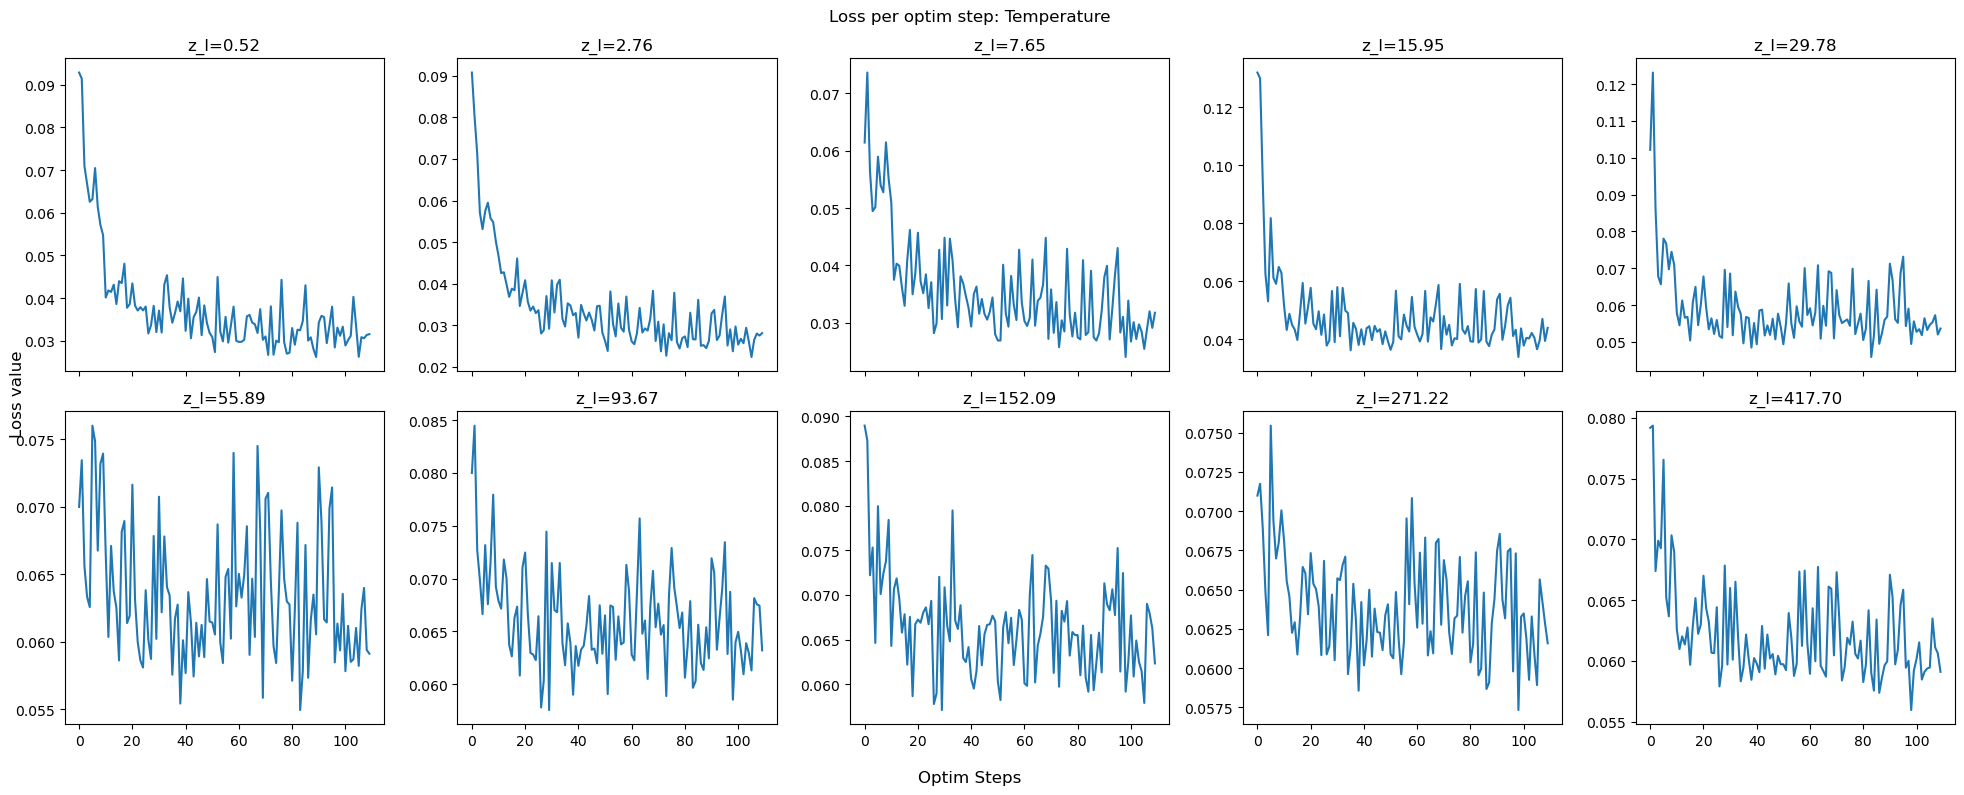

In [15]:
# plot
var = "temp"
extended_var = "temperature"
fig, ax = plot_loss_3d(var, extended_var)

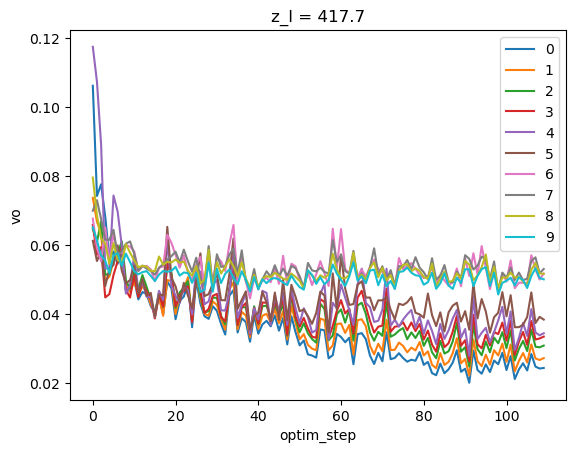

In [23]:
varname = "vo"
vert_dim = "z_l"
for i in range(var_loss.sizes[vert_dim]):
    var_loss[varname].isel(z_l=i).plot(label=i)
plt.legend()
plt.show()

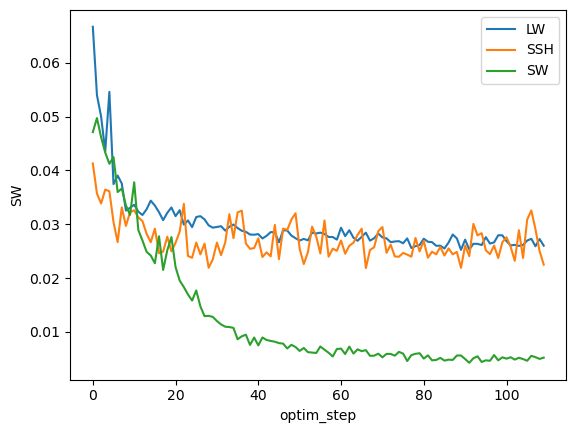

In [31]:
# all 2D variables
vars_2d = [var_name for var_name in var_loss.data_vars if "z_l" not in var_loss[var_name].dims]
for i in range(len(vars_2d)):
    var_loss[vars_2d[i]].plot(label=vars_2d[i])
plt.legend()
plt.show()

In [29]:
len(vars_2d)

3

In [ ]:
fig, ax = plt.subplots()
plt.bar(
    x=ds.var_index,
    height=ds.loss_by_var.isel(optim_step=-1),
)

ax.set(
    xticks=ds.var_index.values,
    xticklabels=ds.var_names.values,
    ylabel="loss function value at final optim_step",
);

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [ ]:
# loss per variable over the number of epochs
loss_by_var = np.zeros((ds.sizes['var_index'], epochs))
for i in range(ds.sizes['var_index']):
    loss_by_var[i,:] = [np.mean(ds.loss_by_var[i, stride*j:(j+1)*stride]) for j in range(epochs)]

fig, ax = plt.subplots(figsize=(8,6))
for i in ds.coords['var_index']:
    ax.plot(loss_by_var[i, :], label=ds.coords['var_names'][i].values)
plt.legend(loc='upper right')
plt.xlabel('Epochs'); plt.ylabel('Loss function value')
plt.title('Loss by variable -- with masking')
#plt.savefig('loss_by_var.png', dpi=300)
plt.show()